In [1]:
import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

## Arithmetical operations

So far all the operations on tensors did not change their elements. Time to change this. 

`numpy` supports all arithmetic operations and many functions in form of elementwise operations. For example  for multiplication

$$ \forall_{ijk}\quad  z_{ijk}=x_{ijkl} \cdot y_{ijk}$$ 

Please note several different ways used to time the commands below. 

In [2]:
x = np.random.normal(0,1,(3,5,2))
y = np.random.normal(0,1,(3,5,2))
%time z = x * y 

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 15.7 µs


Please note that arithmetic operations create a new array. 

In [3]:
print(z.base)

None


This is equivalent to the following loop but faster

In [4]:
%%time
zloop = np.zeros((3,5,2))
for i in range(3):
    for j in range(5):
        for k in range(2):
            z[i,j,k]=x[i,j,k] * y[i,j,k]

CPU times: user 51 µs, sys: 5 µs, total: 56 µs
Wall time: 59.8 µs


Time difference in this case is not  very big, but for bigger arrays it can becomes very large:

In [5]:
import timeit

In [6]:
xb = np.random.normal(0,1,(30,50,20))
yb = np.random.normal(0,1,xb.shape)
start_time = timeit.default_timer()
zb = xb * yb 
end_time = timeit.default_timer()
elapsed_implicit = end_time-start_time
print("Took %s " % (elapsed_implicit,))

Took 0.000292776001515449 


In [7]:
s = xb.shape
start_time = timeit.default_timer()
zbloop = np.empty_like(xb)
for i in range(s[0]):
    for j in range(s[1]):
        for k in range(s[2]):
            zbloop[i,j,k]=xb[i,j,k] * yb[i,j,k]
end_time = timeit.default_timer()            
elapsed_explicit = end_time-start_time
print("Took %fs which is %f times longer!" %(elapsed_explicit, elapsed_explicit/elapsed_implicit))

Took 0.025896s which is 88.450200 times longer!


As you can see the difference is of the order of  hundreds!  That is the main reason you shoudl become fluent in tensor operations.

Similarly we can apply a numpy function to every element of the tensor just by calling it with tensor argument:

$$\forall_{ijk}\quad s_{ijk} = \sin(x_{ijk})$$ 

In [8]:
%time s = np.sin(x)

CPU times: user 21 µs, sys: 2 µs, total: 23 µs
Wall time: 26.7 µs


Please compare yourself the time of the execution of this operation to an explicit loop. 

You can also use a scalar argument in tensor operations with the common sense interpretation:

In [9]:
grumpy = img.imread("GrumpyCat.jpg")

In [10]:
normalized_grumpy = grumpy/255

## Reduction

Another common operations are  reductions. Those are the functions that can be applied to a subset of dimensions "reducing" them  to a single number. Using our freshly acquired skills in array manipulations we will build an array where every column will contain 1000 numbers draw from a different distribution. 

In [11]:
n = 1000
d1 = np.random.normal(0,1, n)
d2 = np.random.normal(1,0.5, n)
d3 = np.random.uniform(0,1,n)
data = np.stack((d1,d2,d3), axis=1)
data.shape

(1000, 3)

A common reduction operation is sum. Without any additional parameters sum sums all the element of the array

In [12]:
np.sum(data, axis =0)

array([  17.06790684, 1018.90453972,  500.15107239])

But we can specify the dimension(s) along which the reduction operation will be applied. 

In [13]:
row_sum = np.sum(data, axis=0)
row_sum.shape

(3,)

As we can see the dimension 1 was "reduced". 

In the same way we can calculate the mean of every column:

In [14]:
np.mean(data)

0.5120411729827586

or standard deviation

In [15]:
np.std(data, axis=1)

array([0.71484768, 1.00476219, 0.54713162, 0.2024203 , 0.19668071,
       0.71140926, 1.12243592, 0.45315536, 0.42529429, 0.65822051,
       0.30859286, 0.53444929, 0.18072313, 0.37632504, 0.22768202,
       0.49800884, 1.39082874, 0.9397719 , 0.65721049, 1.59296009,
       0.7293198 , 0.8656129 , 0.28460597, 0.72704944, 0.50300932,
       1.10684105, 0.70362455, 0.51848396, 0.69054703, 0.53759437,
       0.5104986 , 0.65451589, 0.26721654, 0.64145131, 0.44691203,
       0.76519676, 0.4103844 , 0.34680147, 0.58867122, 0.37145524,
       0.2980492 , 1.53628522, 0.95899227, 0.42889883, 0.32215987,
       0.88998665, 1.05787341, 0.82318016, 0.32068659, 0.87835447,
       0.50544454, 0.49726988, 0.72117939, 0.3652643 , 0.38814531,
       0.33650654, 0.3822809 , 0.89806354, 0.42804332, 0.17960636,
       0.33167548, 1.02604637, 1.03494776, 0.82044649, 0.66017668,
       0.73470978, 1.5859375 , 0.44738847, 0.73704902, 1.31049443,
       0.14172369, 0.40304356, 0.69674348, 0.38100194, 0.24104

We can reduce more then one dimension at the time. Below we calculate the mean value of each chanel in grumpy

In [16]:
np.mean(grumpy, axis=(0,1))

array([117.03265727, 103.90124729, 105.09348518])

or max and min  values

In [17]:
np.min(grumpy, axis=(0,1))

array([0, 0, 0], dtype=uint8)

In [18]:
np.max(grumpy, axis=(0,1))

array([255, 255, 255], dtype=uint8)

## Contractions -- inner product

Another class of operations are contraction. In contraction we sum over two dimensions of a product of two arrays. The examples include the dot (scalar) product

$$ x\cdot y =\sum_{i} x_{i} \cdot y_{i}$$ 

matrix vector multiplication:

$$ v_j =\sum_{i} A_{ji} \cdot w_{i} \quad \forall_{i}$$ 

and matrix multiplication

$$   z_{ij}=\sum_{k} x_{ik} \cdot y_{kj} \quad \forall_{ij}$$ 

`numpy` has special operators for both operations but we can use more general `inner` and `tensordot`. 

`inner` takes two arrays and contracts last dimensions in each of them. That means that the sizes of those dimensions must match. 

When both arrays are vectors this is normal scalar product:

In [19]:
x = np.random.normal(0,1,10)
y = np.ones_like(x)
np.inner(x,y)

-2.064762389721889

When first is  a matrix and other a vector this is matrix vector multiplication:

In [42]:
m = np.asarray([[0.13,-0.17],[-1.1,0.8]])
v = np.array([0.75, -0.23])
np.inner(m,v)

array([ 0.1366, -1.009 ])

Can you tell what the operation below is doing? 

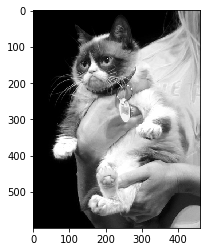

In [53]:
w =np.asarray([1, 1, 1])
G = np.inner(grumpy,w)
plt.imshow(G, cmap = 'gray');

Similar to `inner` is `dot`.Please check out its documentatio [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html). 

Matrix multiplication requires contraction of last and first dimension. That's why it's more convenient to use `tensordot`

In [58]:
A = np.random.normal(0,1,(2,3))
B = np.random.normal(0,2,(3,4))
C = np.tensordot(A,B,1)
C

array([[ 0.1043666 , -3.07526729,  1.74149137, -1.91353187],
       [ 5.31779303, -0.71241599, -1.05800954, -3.55139737]])

In [23]:
print(C.shape)
C

(2, 4)


array([[-1.86269005, -1.24504512, -0.53803446, -0.17687151],
       [ 0.51471527, -1.34674297,  0.21851149, -1.17416381]])

If we want to do matrix multiplication it's better to use 
`matmul` function which is described [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul). This function can be invokde using operator `@`

In [24]:
A@B

array([[-1.86269005, -1.24504512, -0.53803446, -0.17687151],
       [ 0.51471527, -1.34674297,  0.21851149, -1.17416381]])

`tensordot(A,B,n)` is more general contracts last `n` dimensions of array `A` with first `n` dimensions of array `B`. 

In [25]:
A2 = np.random.normal(0,1,(4,3))
B2 = np.random.normal(0,2,(4,3))
C2 = np.tensordot(A2,B2,2)
print(C2.shape)
C2

()


array(-0.04439479)

In the above expression `C2` is calculated as: 
$$ C = \sum_{ij}A_{ij} B_{ij}$$

We can also specify which dimensions will be contracted, by providing lists of dimensions in each array:

In [26]:
A3 = np.random.normal(0,1,(4,3))
B3 = np.random.normal(0,2,(3,4))
C3 = np.tensordot(A3,B3,[[0,1], [1,0]])
print(C3.shape)
C3

()


array(-3.19148045)

Which corresponds to 
$$ C = \sum_{ij}A_{ij} B_{ji}$$
which is more intuitive.

You have a matrix 3x4 matrix W and a set of N 4-vectors in a form of array X of shape (N,4). How to produce an array of shape (N,3) where each row is the product of matrix W and corresponding row of X ? 

## Outer product

What happens when we request zero dimension contraction in `tensordot`? For two vectors this should correspond to
$$ z_{ij} = x_i \cdot y_j\quad \forall_{ij} $$
Let's check this. 

In [27]:
x = np.arange(4)
y = np.arange(5)
z  = np.tensordot(x,y,0)
print(z.shape)
z

(4, 5)


array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12]])

This operation is called outer or tensor product. We can achieve same result with function `outer`

In [28]:
x = np.arange(4)
y = np.arange(5)
z  = np.outer(x,y)
print(z.shape)
z

(4, 5)


array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12]])

However those two functions behave the same same only for 1-dimensional arrays. 

## "Degenerate" dimensions

This a technical but a quite important point. It concerns dimensions with size one. While it may seem that such dimensions are spurious or "degenerate" they nevertheless change the dimensionality of the array and can impact the result of the operations.

Let's start by creating a vector

In [29]:
vector = np.random.normal(0,1,(4,))
print(vector.shape)
vector

(4,)


array([ 1.46568362, -0.20848286,  1.69540608, -1.19607941])

and reshape it to one row matrix 

In [30]:
vector_row = np.reshape(vector,(1,4))
print(vector_row.shape)
vector_row

(1, 4)


array([[ 1.46568362, -0.20848286,  1.69540608, -1.19607941]])

and one column matrix:

In [31]:
vector_column = np.reshape(vector,(4,1))
print(vector_column.shape)
vector_column

(4, 1)


array([[ 1.46568362],
       [-0.20848286],
       [ 1.69540608],
       [-1.19607941]])

Now make some experiments:

In [32]:
np.inner(vector, vector)

6.496701302643633

In [33]:
np.inner(vector_row, vector_row)

array([[6.4967013]])

In [34]:
np.inner(vector_column, vector_column)

array([[ 2.14822847, -0.30556991,  2.48492892, -1.75307399],
       [-0.30556991,  0.0434651 , -0.35346311,  0.24936205],
       [ 2.48492892, -0.35346311,  2.87440179, -2.0278403 ],
       [-1.75307399,  0.24936205, -2.0278403 ,  1.43060595]])

This actually the outer product:

In [35]:
np.outer(vector, vector)

array([[ 2.14822847, -0.30556991,  2.48492892, -1.75307399],
       [-0.30556991,  0.0434651 , -0.35346311,  0.24936205],
       [ 2.48492892, -0.35346311,  2.87440179, -2.0278403 ],
       [-1.75307399,  0.24936205, -2.0278403 ,  1.43060595]])

The only two other combinations that will match are: 

In [36]:
np.inner(vector, vector_row)

array([6.4967013])

In [37]:
np.inner(vector_row, vector)

array([6.4967013])

Please explain the results of all the above operations. Write down using indices what each operation actually does. 